<a href="https://colab.research.google.com/github/agsystem72-crypto/data-analysis-/blob/main/%D0%A2%D0%B8%D1%82%D0%B0%D0%BD%D0%B8%D0%BA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import pandas as pd

In [79]:
df = pd.read_csv('/train.csv')

In [80]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [83]:
df = pd.read_csv('/kaggle/test.csv')

In [84]:
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [49]:
import matplotlib.pyplot as plt
import numpy as np


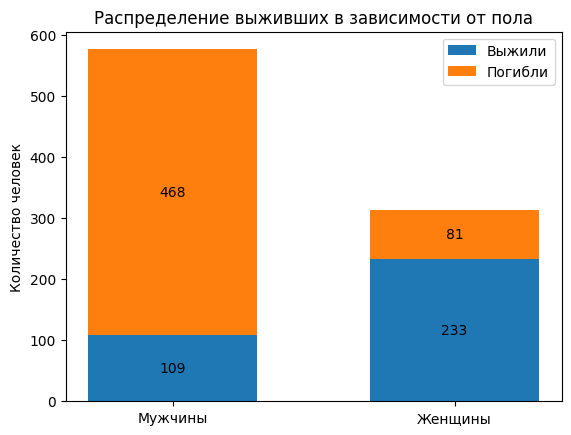

In [50]:
# Посчитаем общее количество мужчин и женщин, а также количество выживших
males_total = len(df.loc[(df['Sex'] == 'male')])
females_total = len(df.loc[(df['Sex'] == 'female')])
males_survived = len(df.loc[((df['Sex'] == 'male') & (df['Survived'] == 1))])
females_survived = len(df.loc[((df['Sex'] == 'female') & (df['Survived'] == 1))])
#Визуализируем
survivors_counts = {
    'Выжили': [males_survived, females_survived],
    'Погибли': [males_total-males_survived, females_total-females_survived]
}
fig, ax = plt.subplots()
bottom = np.zeros(2)

for key, count in survivors_counts.items():
    p = ax.bar(('Мужчины', 'Женщины'), count, width=0.6, label=key, bottom=bottom)
    bottom += count
    ax.bar_label(p, label_type='center')

ax.set_title('Распределение выживших в зависимости от пола')
ax.set_ylabel('Количество человек')
ax.legend()
plt.show()


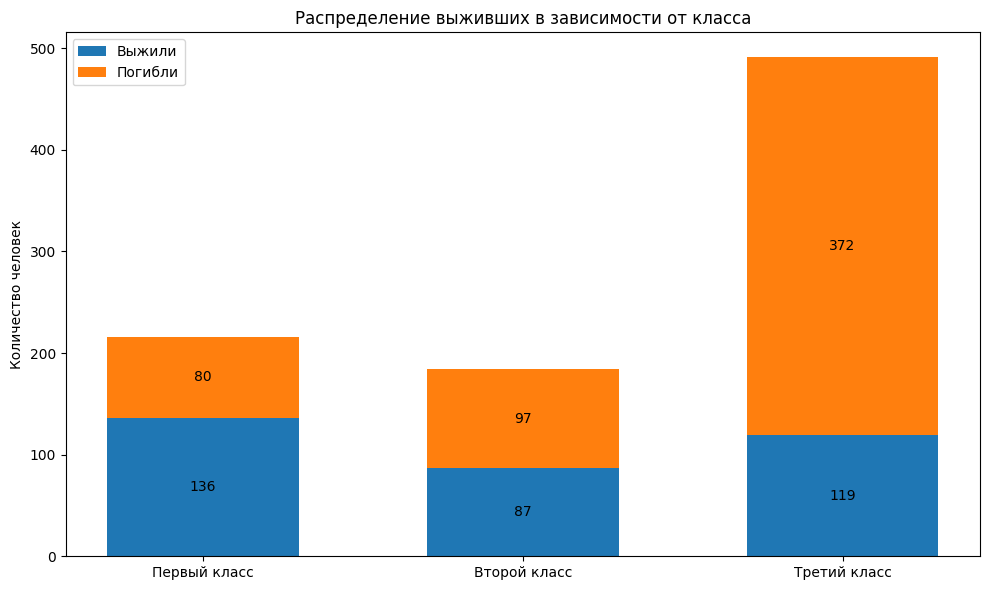

In [51]:
# Посчитаем общее количество первого и второго класса, а также количество выживших
total_1 = len(df.loc[(df['Pclass'] == 1)])
total_2 = len(df.loc[(df['Pclass'] == 2)])
total_3 = len(df.loc[(df['Pclass'] == 3)])

survived_1 = len(df.loc[((df['Pclass'] == 1) & (df['Survived'] == 1))])
survived_2 = len(df.loc[((df['Pclass'] == 2) & (df['Survived'] == 1))])
survived_3 = len(df.loc[((df['Pclass'] == 3) & (df['Survived'] == 1))])

#Визуализируем
survivors_counts = {
    'Выжили': [survived_1, survived_2, survived_3],
    'Погибли': [total_1-survived_1, total_2-survived_2, total_3-survived_3]
}
fig, ax = plt.subplots(figsize=(10, 6))
bottom = np.zeros(3)

for key, count in survivors_counts.items():
    p = ax.bar(
        ['Первый класс', 'Второй класс', 'Третий класс'],
        count,
        width=0.6,
        label=key,
        bottom=bottom
    )
    bottom += count
    ax.bar_label(p, label_type='center')

ax.set_title('Распределение выживших в зависимости от класса')
ax.set_ylabel('Количество человек')
ax.legend()
plt.tight_layout()
plt.show()

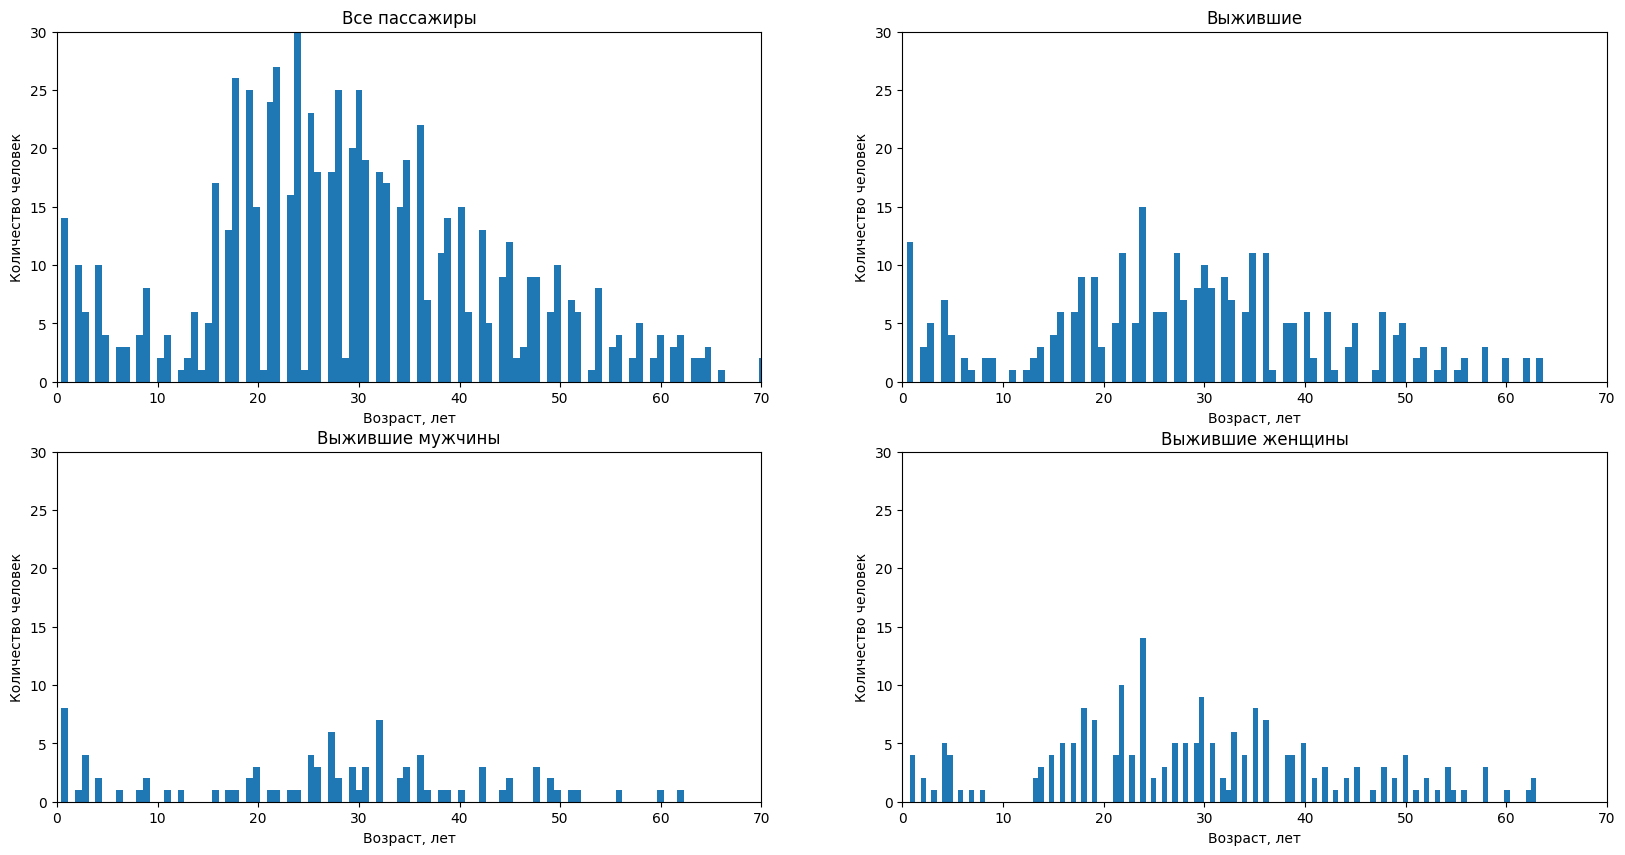

In [52]:
from collections import Counter
#Выберем списки пассжиров в отдельные группы
survivors = df.loc[(df['Survived'] == 1)]
male_survivors = df.loc[((df['Sex'] == 'male') & (df['Survived'] == 1))]
female_survivors = df.loc[((df['Sex'] == 'female') & (df['Survived'] == 1))]

#Число возрастов
num_of_ages = len(dict(Counter(survivors['Age'])).keys())

#Визуализируем
fig, axs = plt.subplots(2,2)
fig.set_figwidth(20)
fig.set_figheight(10)
names = [['Все пассажиры', 'Выжившие'], ['Выжившие мужчины', 'Выжившие женщины']]
for i, surv in enumerate([[df, survivors], [male_survivors, female_survivors]]):
    for j, subsurv in enumerate(surv):
        axs[i][j].hist(subsurv['Age'], bins=num_of_ages)
        axs[i][j].set_title(names[i][j])
        axs[i][j].set_xlabel('Возраст, лет')
        axs[i][j].set_ylabel('Количество человек')
        axs[i][j].set_ylim(0,30)
        axs[i][j].set_xlim(0,70)
plt.show()


In [53]:
import numpy as np
children = df.loc[((df['Age'] < np.float64(18.0)) & (df['Age'] > 0))]
survivors_children = df.loc[((df['Age'] < np.float64(18.0)) & (df['Survived'] == 1) & (df['Age'] > 0))]
print(f'Пасажиров до 18 лет спаслось {round(len(survivors_children)*100/len(children), 2)}%')



Пасажиров до 18 лет спаслось 53.98%


<Axes: >

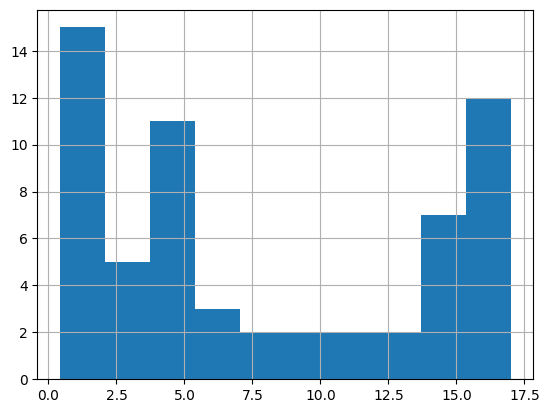

In [54]:
df.loc[((df['Survived'] == 1) & (df['Age'] > 0) & (df['Age'] < 18))].Age.hist()

/tmp/ipython-input-3386324667.py:24: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(ages.values(), labels=titles, vert=True)


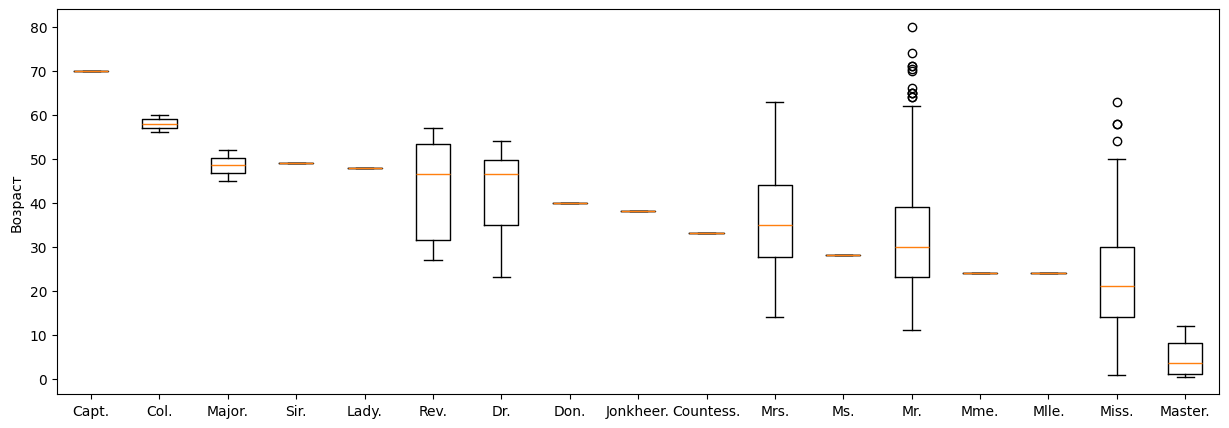

In [55]:
#Перечень титулов
titles = ("Capt.","Col.","Major.","Sir.","Lady.","Rev.","Dr.","Don.","Jonkheer.","Countess.","Mrs.","Ms.","Mr.","Mme.","Mlle.","Miss.","Master.")

#Создадим список титулов для каждого пассажира
titled_names = []
for name in df.Name:
    for title in titles:
        if title in name.split(' '):
            titled_names.append(title)
            break


#Добавим в датафрейм новый столбец - Титул
df.insert(12, 'Title', titled_names)

#Создадим словарь с парами "титул: список возрастов"
ages = dict.fromkeys(titles, [])
for i, title in enumerate(df.Title):
    if not pd.isna(df.Age[i]):
        ages[title] = ages[title] + [df.Age[i]]

#Визуализируем
fig, ax = plt.subplots(figsize=(15,5))
ax.boxplot(ages.values(), labels=titles, vert=True)
ax.set_ylabel('Возраст')
plt.show()


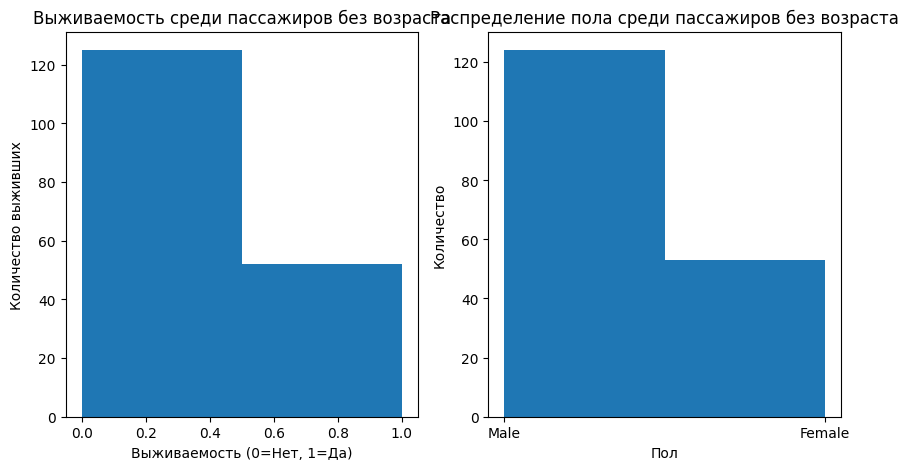

In [56]:

noage = df.loc[(pd.isna(df['Age']))]
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].hist(noage.Survived, bins=2, cumulative=False)
ax[0].set_xlabel('Выживаемость (0=Нет, 1=Да)')
ax[0].set_ylabel('Количество выживших')
ax[0].set_title('Выживаемость среди пассажиров без возраста')


ax[1].hist(noage.Sex.map({'male': 0, 'female': 1}), bins=2)
ax[1].set_xlabel('Пол')
ax[1].set_ylabel('Количество')
ax[1].set_xticks([0, 1])
ax[1].set_xticklabels(['Male', 'Female'])
ax[1].set_title('Распределение пола среди пассажиров без возраста')


plt.show()


In [58]:
for i, age in enumerate(df.Age):
    if pd.isna(age):
        df.Age[i] = np.median(ages[df.Title[i]])

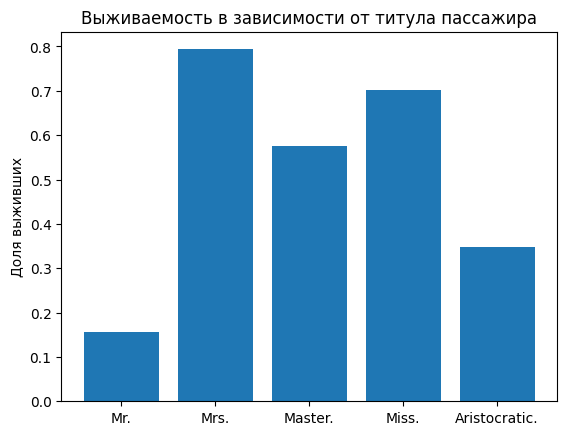

In [61]:
# Группы для объединения
aristocratic = ("Capt.", "Col.", "Don.", "Dr.",
                "Jonkheer.", "Lady.", "Major.",
                "Rev.", "Sir.", "Countess.")
mrs = ("Ms.")
miss = ("Mlle.", 'Mme.')

# Объединяем титулы
for i, title in enumerate(df.Title):
    if title in aristocratic:
        df.Title[i] = 'Aristocratic.'
    elif title in miss:
        df.Title[i] = 'Miss.'
    elif title in mrs:
        df.Title[i] = 'Mrs.'

# В данном случае будет удобно посмотреть на долю выживших, так как количество людей в каждом из титулов значительно разнится
title_survive_percent = dict.fromkeys(set(df.Title), None)
for title in title_survive_percent.keys():
    title_survive_percent[title] = len(df.loc[((df['Title'] == title) & (df['Survived'] == 1))]) / len(df.loc[(df['Title'] == title)])

#Визуализируем
fig, ax = plt.subplots()
ax.bar(title_survive_percent.keys(), title_survive_percent.values())
ax.set_ylabel('Доля выживших')
ax.set_title('Выживаемость в зависимости от титула пассажира')
plt.show()



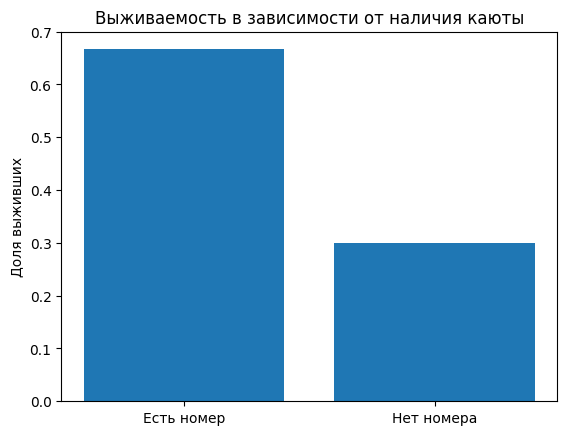

In [62]:
# Выделим пассажиров в группы
have_cabin = df.loc[(pd.notna(df['Cabin']))]
have_cabin_survived = df.loc[((pd.notna(df['Cabin'])) & (df['Survived'] == 1))]
no_cabin = df.loc[(pd.isna(df['Cabin']))]
no_cabin_survived = df.loc[((pd.isna(df['Cabin'])) & (df['Survived'] == 1))]

# Визуализируем долю выживших
fig, ax = plt.subplots()
ax.bar(('Есть номер', 'Нет номера'), (len(have_cabin_survived)/len(have_cabin), len(no_cabin_survived)/len(no_cabin)))
ax.set_ylabel('Доля выживших')
ax.set_title('Выживаемость в зависимости от наличия каюты')
plt.show()


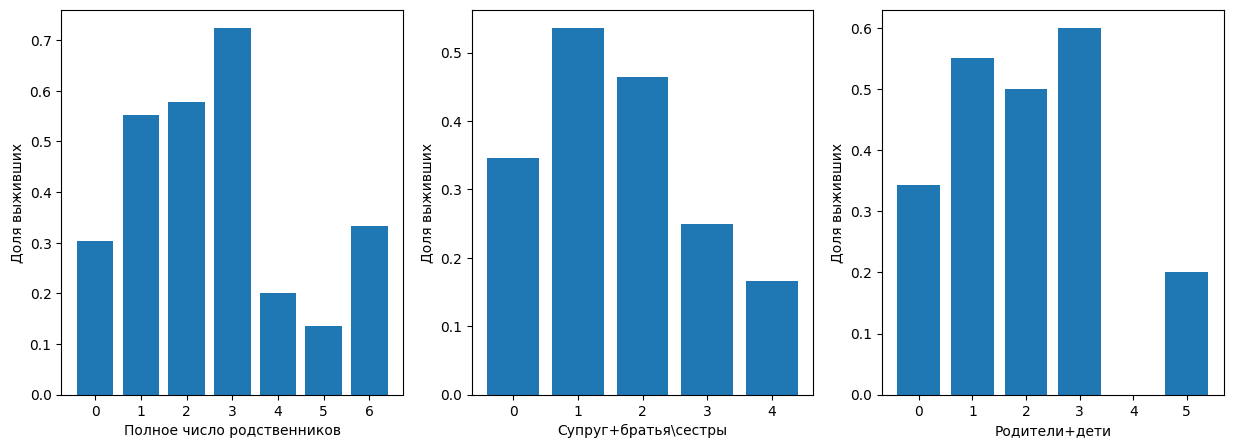

In [64]:
# Добавим признак family
df.insert(13, 'Family', np.array(df.SibSp, int) + np.array(df.Parch, int))

sibsp_total = dict(Counter(df.SibSp))
parch_total = dict(Counter(df.Parch))
family_total = dict(Counter(df.Family))
sibsp_survived = dict(Counter(df.loc[(df['Survived'] == 1)].SibSp))
parch_survived = dict(Counter(df.loc[(df['Survived'] == 1)].Parch))
family_survived = dict(Counter(df.loc[(df['Survived'] == 1)].Family))
relatives = (family_total, sibsp_total, parch_total)
relatives_survived = (family_survived, sibsp_survived, parch_survived)

fig, axs = plt.subplots(1, 3, figsize=(15,5))
xlabs = ('Полное число родственников', 'Супруг+братья\сестры', 'Родители+дети')

for i in range(3):
    probs = []
    for rel, amount in relatives_survived[i].items():
        probs.append(amount / relatives[i][rel])
    axs[i].bar(relatives_survived[i].keys(), probs)
    axs[i].set_ylabel('Доля выживших')
    axs[i].set_xlabel(xlabs[i])
plt.show()


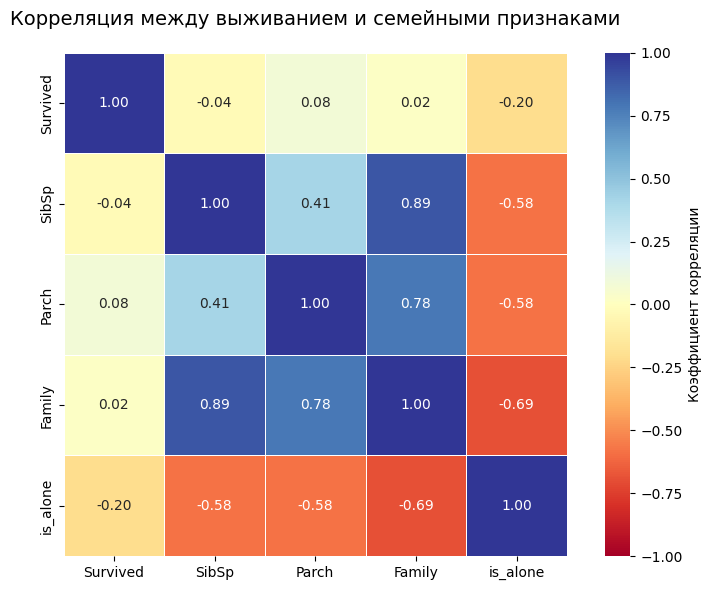

In [69]:

import seaborn as sns
import matplotlib.pyplot as plt

# 1. Создаём is_alone векторизованно (без цикла)
df['is_alone'] = (df['Family'] == 0).astype(int)

# 2. Строим тепловую карту с настройками
plt.figure(figsize=(8, 6))
sns.heatmap(
    df[['Survived', 'SibSp', 'Parch', 'Family', 'is_alone']].corr(),
    annot=True,
    fmt='.2f',
    cmap='RdYlBu',
    vmin=-1, vmax=1,
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={'label': 'Коэффициент корреляции'}
)
plt.title('Корреляция между выживанием и семейными признаками', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

<Axes: >

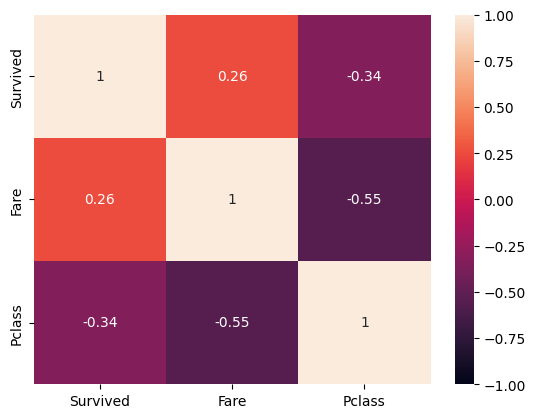

In [68]:
sns.heatmap(df[['Survived', 'Fare', 'Pclass']].corr(), annot=True, vmin=-1, vmax=1)

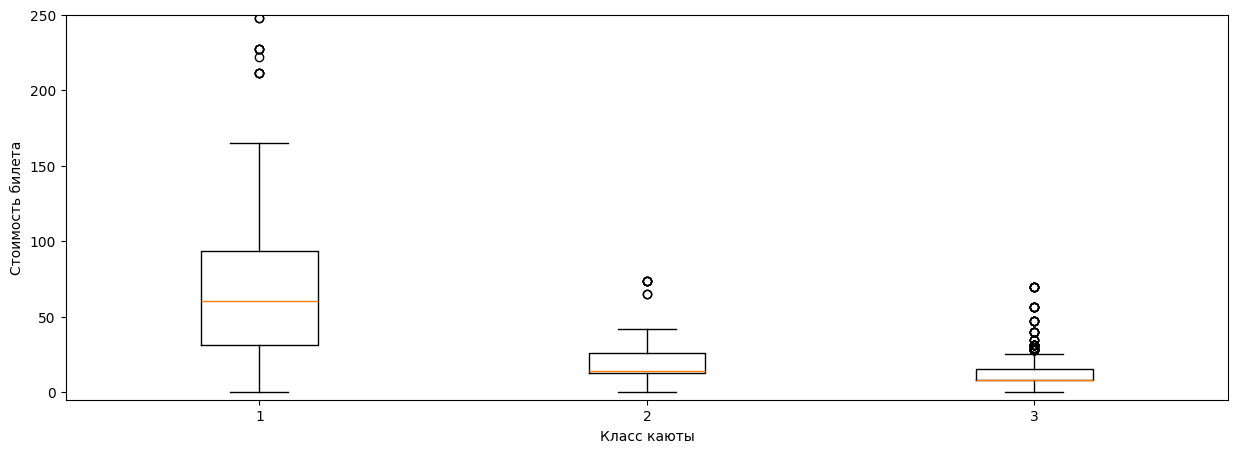

In [71]:
fare = dict.fromkeys((1,2,3), [])
for i, price in enumerate(df.Fare):
    fare[df.Pclass[i]] = fare[df.Pclass[i]] + [price]


fig, ax = plt.subplots(figsize=(15,5))

ax.boxplot(fare.values(), tick_labels=(1, 2, 3), vert=True)
ax.set_ylabel('Стоимость билета')
ax.set_xlabel('Класс каюты')
ax.set_ylim(-5, 250)
plt.show()


In [73]:
# Вычисляем медиану Fare по Pclass (без нулей)
median_fare_by_class = df[df['Fare'] > 0].groupby('Pclass')['Fare'].median()

# Заменяем нули на медиану по классу
df['Fare'] = df.apply(
    lambda row: median_fare_by_class[row['Pclass']] if np.isclose(row['Fare'], 0.0) else row['Fare'],
    axis=1
)

In [75]:
if df['Embarked'].isna().any():
    df['Embarked'] = df['Embarked'].fillna('S')
    print("Пропуски в 'Embarked' заполнены значением 'S'.")
else:
    print("В 'Embarked' нет пропусков.")


В 'Embarked' нет пропусков.


In [93]:
df = pd.read_csv('/kaggle/test.csv')

In [96]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [94]:
df = pd.read_csv('/train.csv')

In [95]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


/tmp/ipython-input-54165654.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset.Fare.fillna(0, inplace = True)
/tmp/ipython-input-54165654.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.meth

<Axes: >

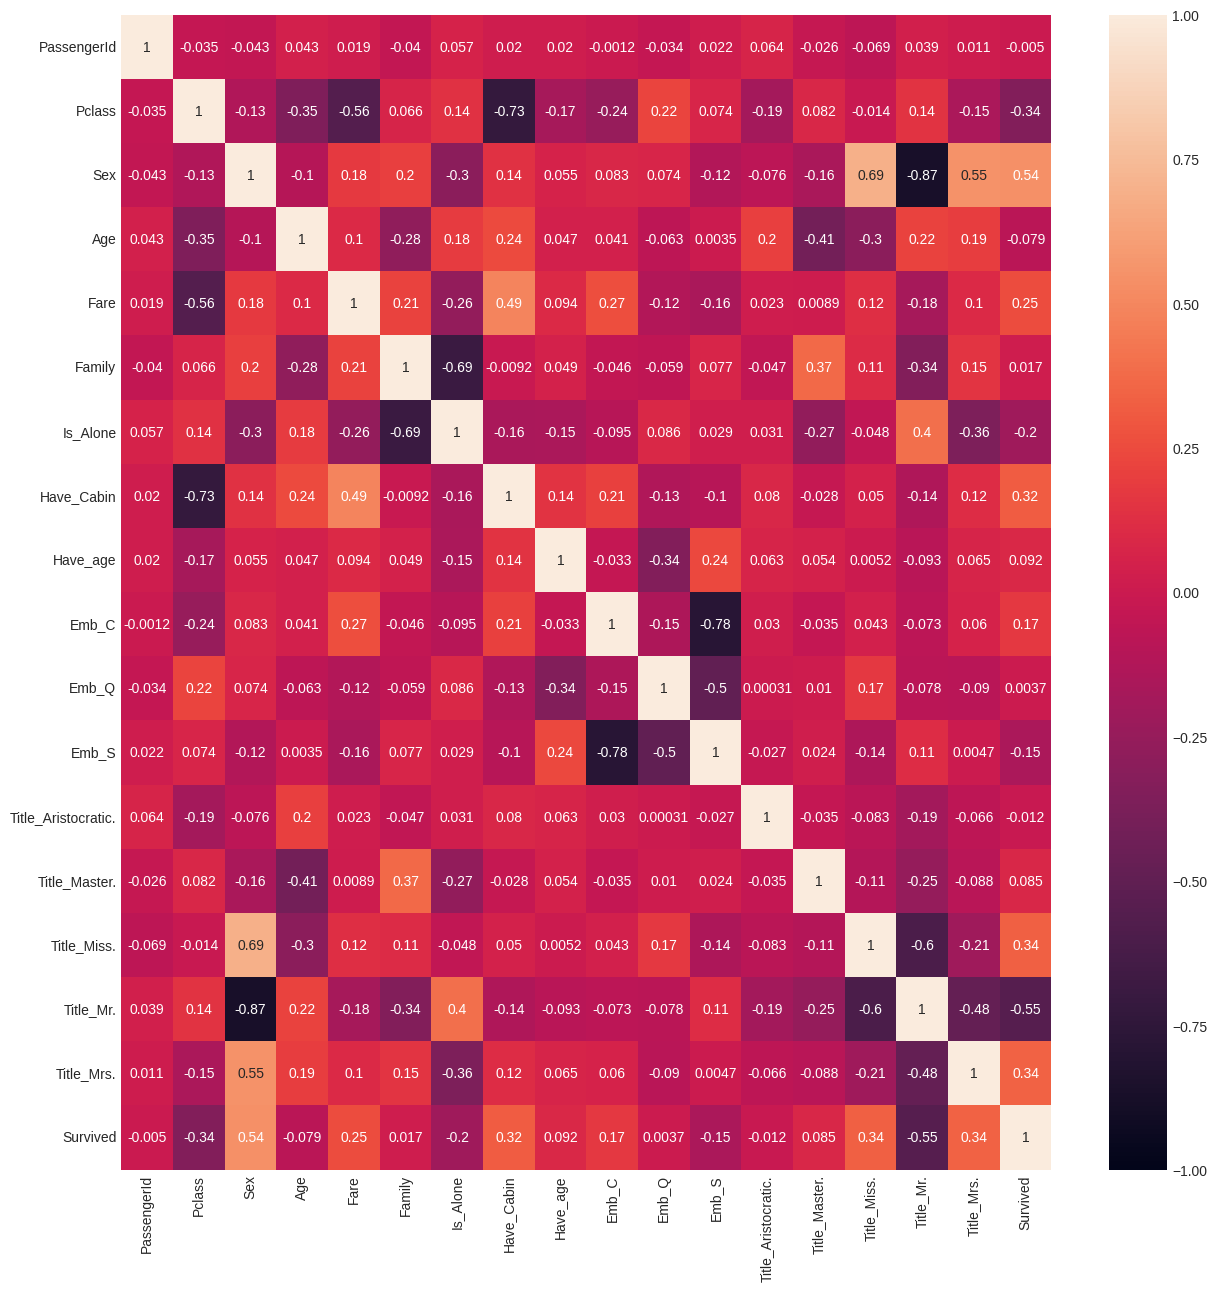

In [99]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

TITLES = ("Capt.","Col.","Major.","Sir.","Lady.","Rev.","Dr.","Don.","Jonkheer.","Countess.","Mrs.","Ms.","Mr.","Mme.","Mlle.","Miss.","Master.", "Dona.")
ARISTOCRATIC = ("Capt.", "Col.", "Don.", "Dr.",
                "Jonkheer.", "Lady.", "Major.",
                "Rev.", "Sir.", "Countess.", 'Dona')
MRS = ("Ms.",)
MISS = ("Mlle.", 'Mme.')

for file in ('train', 'test'):

    # Считываем файл
    dataset = pd.read_csv(f'{file}.csv')

    # Кодируем пол
    dataset = dataset.replace({'female' : 1, 'male': 0})

    # Восстанавливаем стоимость билетов
    dataset.Fare.fillna(0, inplace = True)
    fares = dict.fromkeys((1,2,3), [])
    for i, price in enumerate(dataset.Fare):
        fares[dataset.Pclass[i]] = fares[dataset.Pclass[i]] + [price]
    for i, fare in enumerate(dataset.Fare):
        if np.isclose(fare, .0):
            dataset.loc[i, 'Fare'] = np.median(fares[dataset.Pclass[i]])

    #Создадим список титулов для каждого пассажира
    titled_names = []
    for name in dataset.loc[:, 'Name']:
        for title in TITLES:
            if title in name.split(' '):
                titled_names.append(title)
                break

    # Вставляем в датасет столбец Title
    dataset.insert(1, 'Title', titled_names)

    #Создадим словарь с парами "титул: список возрастов"
    ages = dict.fromkeys(TITLES, [])
    for i, title in enumerate(dataset.Title):
        if not pd.isna(dataset.Age[i]):
            ages[title] = ages[title] + [dataset.Age[i]]

    # Создаем признак Семья
    dataset['Family'] = dataset.Parch + dataset.SibSp

    # Кодируем бинарные признаки
    dataset['Is_Alone'] = dataset.Family == 0
    dataset['Have_Cabin'] = pd.notna(dataset.Cabin)
    dataset['Have_age'] = pd.notna(dataset.Age)
    dataset = dataset.replace({True: 1, False: 0})

    # Восстанавливаем пропущенные возраста
    for i, age in enumerate(dataset.loc[:, 'Age']):
        if pd.isna(age):
            dataset.loc[i, 'Age'] = np.median(ages[dataset.Title[i]])

    # Объединяем титулы
    for i, title in enumerate(dataset.Title):
        if title in ARISTOCRATIC:
            dataset.loc[i, 'Title'] = 'Aristocratic.'
        elif title in MISS:
            dataset.loc[i, 'Title'] = 'Miss.'
        elif title in MRS:
            dataset.loc[i, 'Title'] = 'Mrs.'

    # Восстанавливаем порт отправления
    dataset.Embarked.fillna(dataset.Embarked.mode()[0], inplace = True)

    # Кодируем порт и титулы
    dataset = dataset.join(pd.get_dummies(dataset.Embarked, prefix='Emb'))
    dataset = dataset.join(pd.get_dummies(dataset.Title, prefix='Title'))

    # Чистим от лишних столбцов
    dataset = dataset.drop(columns=['Ticket', 'Name', 'SibSp', 'Parch', 'Cabin', 'Title', 'Embarked'])

    # Перемещаем столбец Survived в конец
    try:
        dataset.insert(dataset.shape[1] - 1, 'Survived', dataset.pop('Survived'))
    except KeyError:
        ...

    dataset.to_csv(f'clear_{file}.csv', index=False)
# Построим таблицу корреляции всех отобранных признаков.
train_set = pd.read_csv('clear_train.csv')

fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(train_set.corr(), annot=True, vmin=-1, vmax=1, ax=ax)


Файл train.csv успешно обработан и сохранен как clear_train.csv
Файл test.csv успешно обработан и сохранен как clear_test.csv


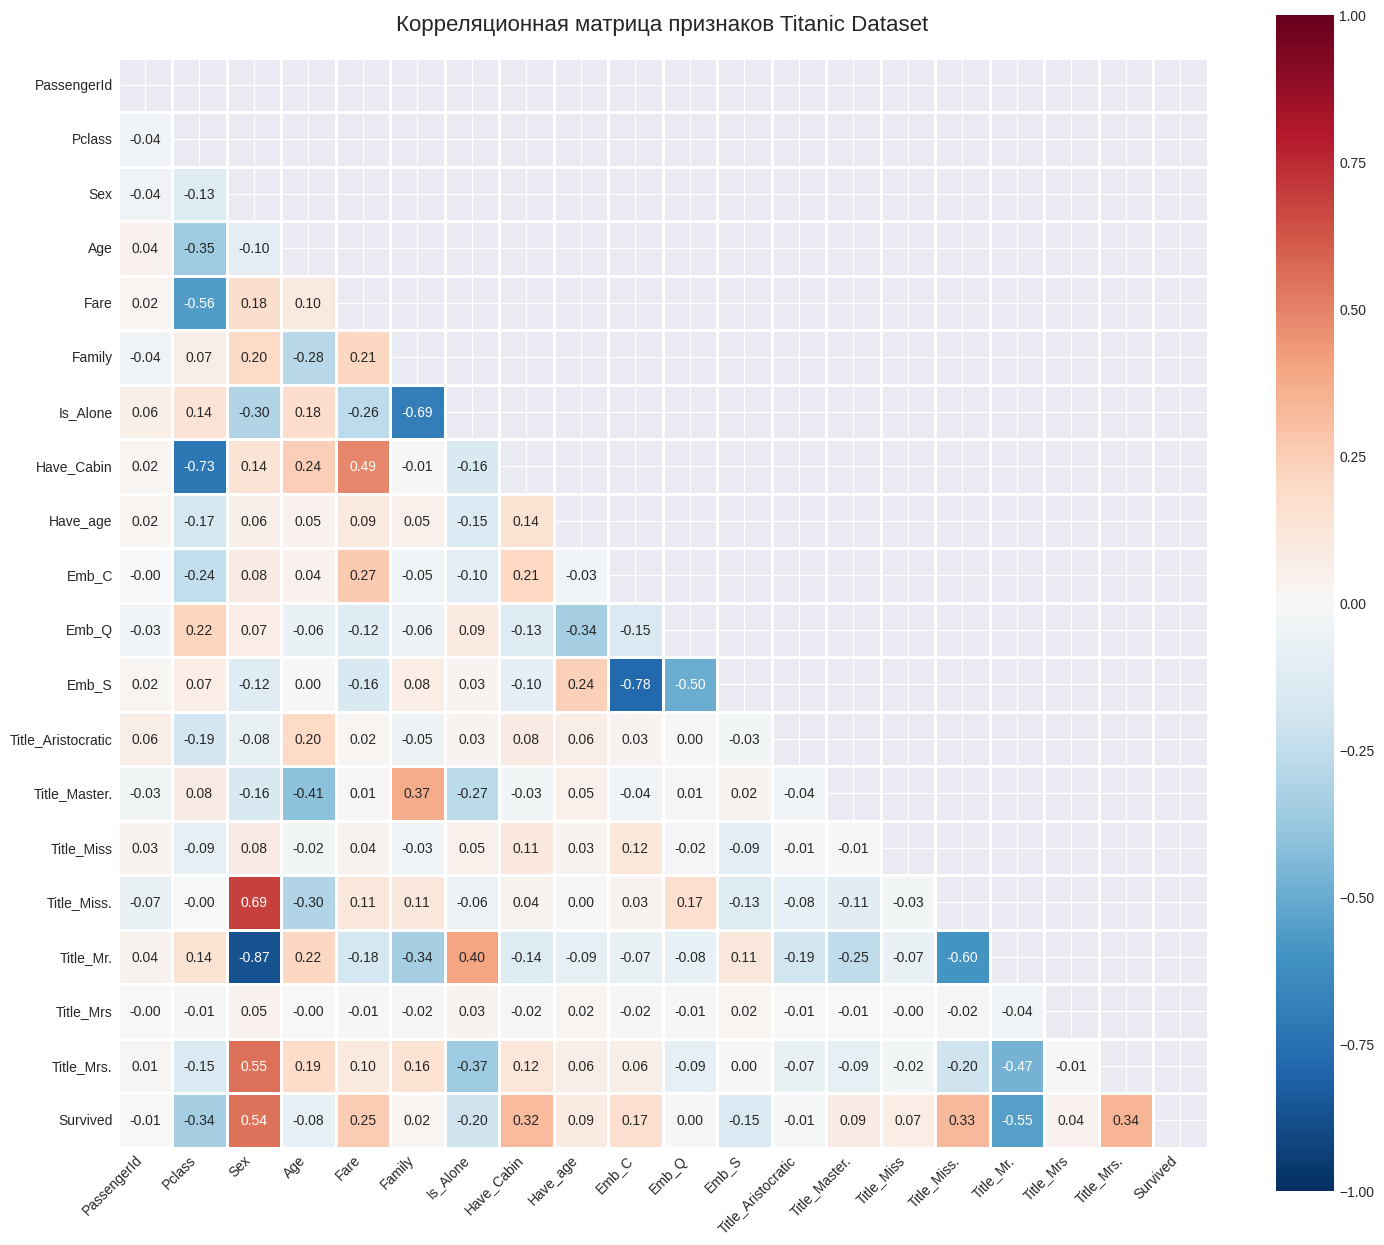


Топ-10 признаков по корреляции с Survived:
Survived         1.000000
Sex              0.543351
Title_Mrs.       0.339040
Title_Miss.      0.327093
Have_Cabin       0.316912
Fare             0.250635
Emb_C            0.168240
Have_age         0.092197
Title_Master.    0.085221
Title_Miss       0.073642
Name: Survived, dtype: float64


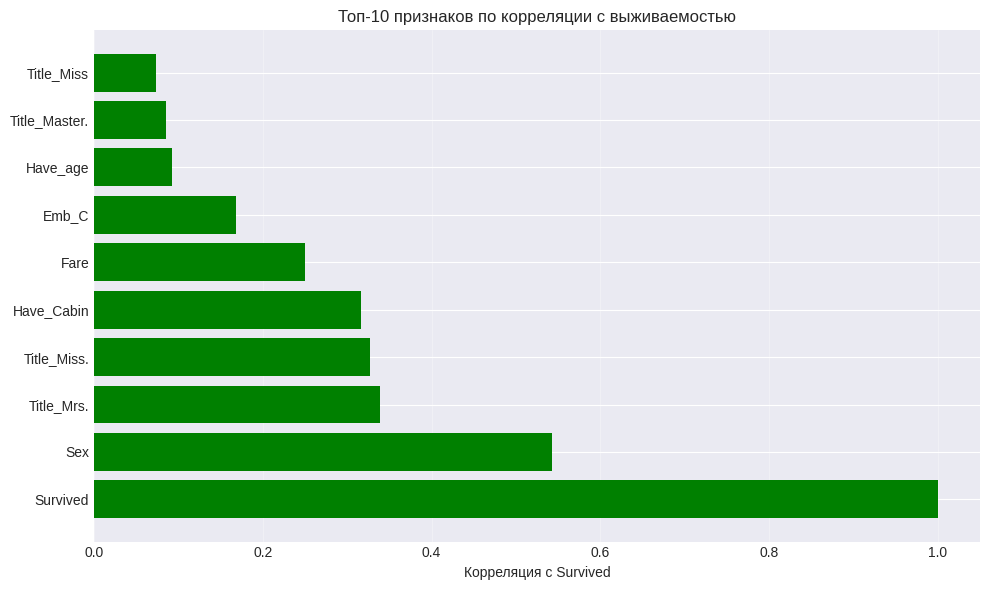


Информация об обработанном train датасете:
Размер: (891, 20)

Первые 5 строк:
   PassengerId  Pclass  Sex   Age     Fare  Family  Is_Alone  Have_Cabin  \
0            1       3    0  22.0   7.2500       1         0           0   
1            2       1    1  38.0  71.2833       1         0           1   
2            3       3    1  26.0   7.9250       0         1           0   
3            4       1    1  35.0  53.1000       1         0           1   
4            5       3    0  35.0   8.0500       0         1           0   

   Have_age  Emb_C  Emb_Q  Emb_S  Title_Aristocratic  Title_Master.  \
0         1  False  False   True               False          False   
1         1   True  False  False               False          False   
2         1  False  False   True               False          False   
3         1  False  False   True               False          False   
4         1  False  False   True               False          False   

   Title_Miss  Title_Miss.  Title_Mr.

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os  # Добавляем импорт os

# Для загрузки файлов в Colab
try:
    from google.colab import files
    IN_COLAB = True
except ImportError:
    IN_COLAB = False

TITLES = ("Capt.","Col.","Major.","Sir.","Lady.","Rev.","Dr.","Don.","Jonkheer.","Countess.","Mrs.","Ms.","Mr.","Mme.","Mlle.","Miss.","Master.", "Dona.")
ARISTOCRATIC = ("Capt.", "Col.", "Don.", "Dr.",
                "Jonkheer.", "Lady.", "Major.",
                "Rev.", "Sir.", "Countess.", 'Dona')
MRS = ("Ms.")
MISS = ("Mlle.", 'Mme.')

# Функция для проверки наличия файлов
def check_files_exist():
    files_needed = ['train.csv', 'test.csv']
    missing_files = []

    for file in files_needed:
        if not os.path.exists(file):
            missing_files.append(file)

    if missing_files and IN_COLAB:
        print(f"Файлы {missing_files} не найдены в текущей директории.")
        print("Пожалуйста, загрузите файлы train.csv и test.csv")
        print("Нажмите на кнопку 'Выбрать файлы' и загрузите оба файла")
        uploaded = files.upload()

        # Переименовываем загруженные файлы, если нужно
        for filename in uploaded.keys():
            print(f'Загружен файл: {filename}')
    elif missing_files:
        print(f"Ошибка: Файлы {missing_files} не найдены.")
        print("Убедитесь, что train.csv и test.csv находятся в текущей директории.")
        return False

    return True

# Проверяем наличие файлов перед началом обработки
if not check_files_exist():
    # Если не в Colab и файлы не найдены, выходим
    if not IN_COLAB:
        exit()

# Исправляем FutureWarning для replace
pd.set_option('future.no_silent_downcasting', True)

# Исправляем создание словаря fares
for file in ('train', 'test'):
    try:
        # Считываем файл
        dataset = pd.read_csv(f'{file}.csv')

        # Кодируем пол без FutureWarning
        dataset['Sex'] = dataset['Sex'].map({'female': 1, 'male': 0})

        # Восстанавливаем стоимость билетов без FutureWarning
        dataset['Fare'] = dataset['Fare'].fillna(0)

        # ИСПРАВЛЕНИЕ: Правильное создание словаря fares
        fares = {1: [], 2: [], 3: []}
        for i, price in enumerate(dataset['Fare']):
            pclass = dataset['Pclass'].iloc[i]
            if pclass in fares:
                fares[pclass].append(price)

        # Заменяем нулевые стоимости медианой по классу
        for i, fare in enumerate(dataset['Fare']):
            if np.isclose(fare, 0.0) or pd.isna(fare):
                pclass = dataset['Pclass'].iloc[i]
                if fares[pclass]:
                    dataset.loc[i, 'Fare'] = np.median(fares[pclass])

        # Создаем список титулов для каждого пассажира
        titled_names = []
        for name in dataset['Name']:
            title_found = False
            for title in TITLES:
                if title in name:
                    titled_names.append(title)
                    title_found = True
                    break
            if not title_found:
                titled_names.append('Unknown')

        # Вставляем в датасет столбец Title
        dataset.insert(1, 'Title', titled_names)

        # Исправляем создание словаря ages
        from collections import defaultdict
        ages = defaultdict(list)
        for i, title in enumerate(dataset['Title']):
            age = dataset['Age'].iloc[i]
            if not pd.isna(age):
                ages[title].append(age)

        # Создаем признак Семья
        dataset['Family'] = dataset['Parch'] + dataset['SibSp']

        # Кодируем бинарные признаки
        dataset['Is_Alone'] = (dataset['Family'] == 0).astype(int)
        dataset['Have_Cabin'] = dataset['Cabin'].notna().astype(int)
        dataset['Have_age'] = dataset['Age'].notna().astype(int)

        # Восстанавливаем пропущенные возраста
        for i, age in enumerate(dataset['Age']):
            if pd.isna(age):
                title = dataset['Title'].iloc[i]
                if ages[title]:
                    dataset.loc[i, 'Age'] = np.median(ages[title])
                else:
                    dataset.loc[i, 'Age'] = dataset['Age'].median()

        # Объединяем титулы
        for i, title in enumerate(dataset['Title']):
            if title in ARISTOCRATIC:
                dataset.loc[i, 'Title'] = 'Aristocratic'
            elif title in MISS:
                dataset.loc[i, 'Title'] = 'Miss'
            elif title == 'Ms.':
                dataset.loc[i, 'Title'] = 'Mrs'
            elif title not in ['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Aristocratic']:
                dataset.loc[i, 'Title'] = 'Rare'

        # Восстанавливаем порт отправления без FutureWarning
        if 'Embarked' in dataset.columns:
            mode_value = dataset['Embarked'].mode()
            if not mode_value.empty:
                dataset['Embarked'] = dataset['Embarked'].fillna(mode_value[0])
            else:
                dataset['Embarked'] = dataset['Embarked'].fillna('S')

        # Кодируем порт и титулы
        if 'Embarked' in dataset.columns:
            embarked_dummies = pd.get_dummies(dataset['Embarked'], prefix='Emb')
            dataset = pd.concat([dataset, embarked_dummies], axis=1)

        title_dummies = pd.get_dummies(dataset['Title'], prefix='Title')
        dataset = pd.concat([dataset, title_dummies], axis=1)

        # Удаляем ненужные столбцы
        columns_to_drop = ['Ticket', 'Name', 'SibSp', 'Parch', 'Cabin']
        if 'Title' in dataset.columns:
            columns_to_drop.append('Title')
        if 'Embarked' in dataset.columns:
            columns_to_drop.append('Embarked')

        dataset = dataset.drop(columns=columns_to_drop)

        # Перемещаем столбец Survived в конец (только для train)
        if 'Survived' in dataset.columns:
            survived_col = dataset.pop('Survived')
            dataset['Survived'] = survived_col

        # Сохраняем обработанный файл
        dataset.to_csv(f'clear_{file}.csv', index=False)
        print(f"Файл {file}.csv успешно обработан и сохранен как clear_{file}.csv")

    except FileNotFoundError as e:
        print(f"Ошибка: Файл {file}.csv не найден")
        print(f"Текущая директория: {os.getcwd()}")
        print(f"Содержимое директории: {os.listdir('.')}")
        continue
    except Exception as e:
        print(f"Ошибка при обработке файла {file}.csv: {e}")
        import traceback
        traceback.print_exc()
        continue

# Проверяем, создался ли clear_train.csv
if os.path.exists('clear_train.csv'):
    # Построим таблицу корреляции всех отобранных признаков
    train_set = pd.read_csv('clear_train.csv')

    # Установим стиль для лучшей визуализации
    plt.style.use('seaborn-v0_8-darkgrid')
    fig, ax = plt.subplots(figsize=(15, 15))

    # Создаем тепловую карту корреляций
    corr_matrix = train_set.corr()
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # Маска для верхнего треугольника

    sns.heatmap(corr_matrix,
                annot=True,
                fmt='.2f',
                vmin=-1,
                vmax=1,
                ax=ax,
                cmap='RdBu_r',
                center=0,
                square=True,
                linewidths=1,
                cbar_kws={"shrink": 0.8},
                mask=mask)

    # Добавляем заголовок
    plt.title('Корреляционная матрица признаков Titanic Dataset', fontsize=16, pad=20)

    # Улучшаем читаемость
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)

    plt.tight_layout()
    plt.show()

    # Дополнительно можно вывести самые значимые корреляции с целевой переменной Survived
    if 'Survived' in train_set.columns:
        print("\nТоп-10 признаков по корреляции с Survived:")
        survived_corr = train_set.corr()['Survived'].sort_values(ascending=False)
        print(survived_corr.head(10))

        # Визуализируем топ-корреляции
        plt.figure(figsize=(10, 6))
        top_features = survived_corr.head(10).index
        top_values = survived_corr.head(10).values
        colors = ['green' if x > 0 else 'red' for x in top_values]

        plt.barh(range(len(top_features)), top_values, color=colors)
        plt.yticks(range(len(top_features)), top_features)
        plt.xlabel('Корреляция с Survived')
        plt.title('Топ-10 признаков по корреляции с выживаемостью')
        plt.grid(axis='x', alpha=0.3)
        plt.tight_layout()
        plt.show()
else:
    print("Файл clear_train.csv не создан. Проверьте обработку данных.")

# Показать информацию о данных
if os.path.exists('clear_train.csv'):
    train_set = pd.read_csv('clear_train.csv')
    print("\nИнформация об обработанном train датасете:")
    print(f"Размер: {train_set.shape}")
    print(f"\nПервые 5 строк:")
    print(train_set.head())
    print(f"\nИнформация о типах данных и пропусках:")
    print(train_set.info())
    print(f"\nСтатистическое описание:")
    print(train_set.describe())

In [100]:
def normalize_data(train_vector: np.ndarray, test_vector: np.ndarray) -> tuple[np.ndarray, np.ndarray]:

    train_arr, test_arr = train_vector, test_vector
    united_arr = np.concatenate((train_arr, test_arr))

    mean = np.mean(united_arr, axis=0)
    std_deviation = np.std(united_arr, axis=0)

    train_X = (train_arr - mean) / std_deviation
    test_X = (test_arr - mean) / std_deviation

    return train_X, test_X


In [101]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        self.layer_1 = nn.Linear(16, 512)
        self.b_norm = nn.BatchNorm1d(512)
        self.layer_2 = nn.Linear(512, 2048)
        self.layer_3 = nn.Linear(2048, 512)
        self.layer_4 = nn.Linear(512, 2)

        self.dropout = nn.Dropout(0.3)

    def forward(self, x):
        x = self.layer_1(x)
        x = F.relu(x)
        x = self.dropout(x)
        x = self.b_norm(x)

        x = self.layer_2(x)
        x = F.relu(x)
        x = self.dropout(x)

        x = self.layer_3(x)
        x = F.relu(x)
        x = self.dropout(x)

        x = self.layer_4(x)
        x = F.softmax(x)

        return x
